In [1]:
# Create an empty list to store arrays from each file
data_list = []
import os
import numpy as np

print(os.getcwd())
# Specify the directory
directory = "0.5gcc_1000k_3bR/"
#directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/1.0gcc_2000K_3B_graphs/1.0gcc_2000K_3B_graphs/1.0gcc_2000k_3bR/"
#directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/2.0gcc_6000K_3B_graphs/2.0gcc_6000k_3bR/"
# Set the desired subsample size
subsample_size = 1000
# Loop over the range of integers from 50 to 74
for i in range(50, 75):
    # Generate the filename
    filename = f'{directory}00{i}.3b_clu-r.txt'
    
    try:
        # Read the data from the file and append it to the list
        data = np.loadtxt(filename)
        sort_data = np.sort(data, axis=1)

        # Subsample the sorted data using random indices
        #random_indices = np.random.choice(sort_data.shape[0], size=subsample_size, replace=False)
        #subsampled_data = sort_data[random_indices, :]
        
        # data_list.append(sort_data) # Account for graph invariance
        #data_list.append(subsampled_data)  # Account for graph invariance
        data_list.append(sort_data)  # Account for graph invariance
    except FileNotFoundError:
        print(f"File not found: {filename}")

# Concatenate the list of arrays along axis 0 (rows)
concat_data = np.concatenate(data_list, axis=0)


# Print the shape of concatenated data
print("Shape:", np.shape(concat_data))
concat_data

/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/0.5gcc_1000K_3B_graphs/0.5gcc_1000K_3B_graphs
Shape: (19251, 3)


array([[4.44851, 4.85077, 4.90778],
       [2.97423, 3.23091, 4.90778],
       [4.44851, 4.62766, 4.66765],
       ...,
       [2.49198, 2.6107 , 4.15738],
       [4.15738, 4.19719, 4.77817],
       [2.56741, 2.6107 , 4.77817]])

/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


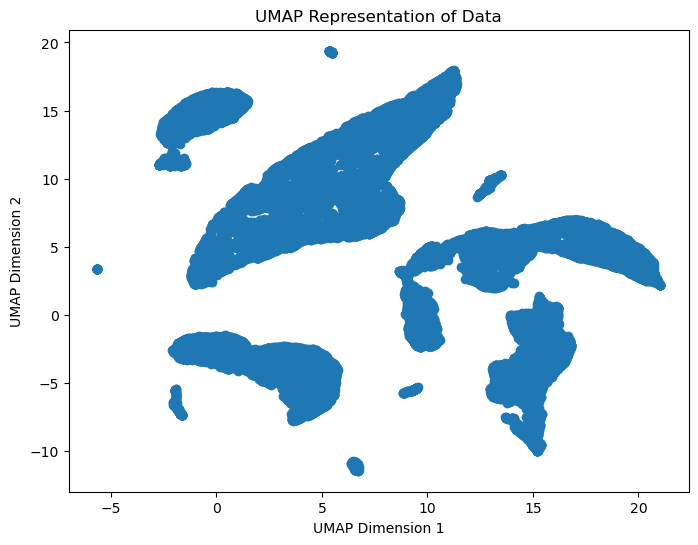

In [2]:
import numpy as np
import umap.umap_ as umap
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data matrix is called 'data' with size (n, 3)
# where n is the number of samples and 3 is the number of features.

# Create a UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(random_state=42,n_components=2)

# Fit the UMAP model to your data and transform it to 2 dimensions
embedding = umap_model.fit_transform(concat_data)

# Calculate KDE
x = embedding[:,0]
y = embedding[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
first, second, z = x[idx], y[idx], z[idx]

# corners = np.array([
#     [-3, 17],  # 1
#     [11, 18],  # 7
#     [2, -10],  # 2
#     [22, 0],  # 0
# ])

# test_pts = np.array([
#     (corners[0]*(1-x) + corners[1]*x)*(1-y) +
#     (corners[2]*(1-x) + corners[3]*x)*y
#     for y in np.linspace(0, 1, 10)
#     for x in np.linspace(0, 1, 10)
# ])

# inv_transformed_points = umap_model.inverse_transform(test_pts)

# print(inv_transformed_points)

# Plot the embedded data with colors and shapes based on labels
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
#plt.scatter(first, second, c=z)
plt.scatter(first, second)
# Plot the locations of the text points
#plt.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Representation of Data')
plt.show()

# # Create a new DataFrame
# new_df = pd.DataFrame({'Column1': x, 'Column2': y})
# sns.jointplot(x=new_df['Column1'], y=new_df['Column2'], kind='kde')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

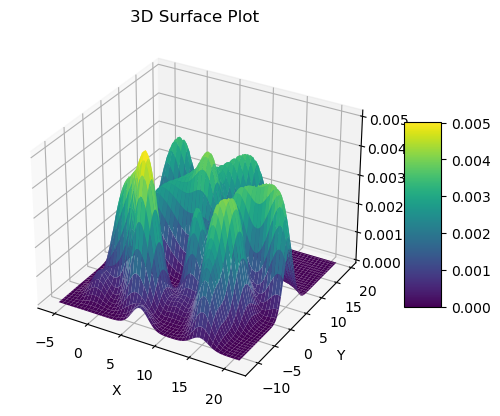

In [3]:
# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


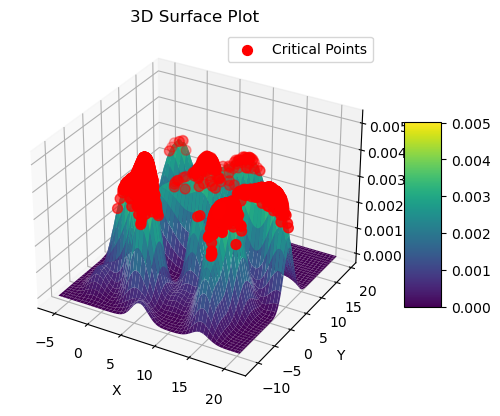

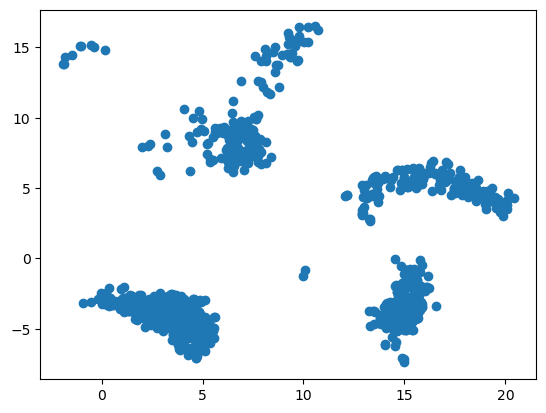

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

# Assuming embedding is your data
x = embedding[:, 0]
y = embedding[:, 1]
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Find local maxima in z with a minimum prominence
peaks, _ = find_peaks(z, distance=10, height=0.5*z.max())  # Adjust the prominence threshold as needed

# Extract critical points
critical_points_x = x[peaks]
critical_points_y = y[peaks]
critical_points_z = z[peaks]

# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Plot critical points as red points
ax.scatter(critical_points_x, critical_points_y, critical_points_z, color='red', s=50, label='Critical Points')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add legend
ax.legend()

plt.show()
plt.scatter(critical_points_x,critical_points_y)
plt.show()


Centroid 0: Label 0 - Coordinates: [14.917331  -3.4697912]
Centroid 1: Label 1 - Coordinates: [16.49224   5.096437]
Centroid 2: Label 2 - Coordinates: [ 3.5683515 -4.249114 ]
Centroid 3: Label 3 - Coordinates: [7.0443416 9.50278  ]
Centroid 4: Label 4 - Coordinates: [-1.0962865 14.612281 ]
Centroid 5: Label 5 - Coordinates: [10.041246  -1.0330358]


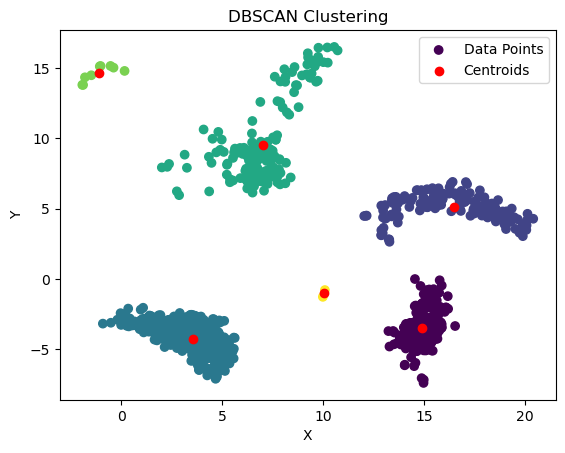

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are your data
X = np.column_stack((critical_points_x, critical_points_y))  # Stack x and y to form the input data matrix

db = DBSCAN(eps=2.0, min_samples=2).fit(X)
labels = db.labels_

# Get centroids (the geometric mean of all points in a cluster)
centroids = []
centroid_labels = []
unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  # Exclude noise points (-1)
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        centroid_labels.append(label)

centroids = np.array(centroids)

# Print centroids and their labels
for i, centroid in enumerate(centroids):
    print(f"Centroid {i}: Label {centroid_labels[i]} - Coordinates: {centroid}")

# Plot data points
plt.scatter(critical_points_x, critical_points_y, c=labels, cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='o', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [6]:
from matplotlib.patches import Polygon

def coordinates_of_triangle_given_SSS(a, b, c):
    """a, b and c are lengths of the sides of a triangle"""

    A = (0, 0) # coordinates of vertex A

    B = (c, 0) # coordinates of vertex B

    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root

    C = (float(C_x), float(C_y)) # coordinates of vertex C

    vertices = np.array([A,B,C])
    return vertices


for label in labels:
    critical_points_x_label = critical_points_x[labels == 0]
    critical_points_y_label = critical_points_y[labels == 0]


0
1
0
1
0
0
1
0
0
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
0
0
1
1
0
2
1
0
3
2
1
3
0
0
0
0
3
2
2
1
0
1
2
0
2
2
1
2
0
2
0
2
2
2
2
2
2
2
0
0
1
2
2
2
1
2
2
4
3
1
0
0
0
0
2
2
0
2
0
0
3
2
2
2
2
0
0
2
2
2
0
2
2
2
2
2
3
2
1
4
4
1
3
2
2
2
2
2
1
1
1
1
0
1
1
2
3
3
1
2
2
0
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
0
1
1
3
3
2
4
2
2
0
0
2
3
2
0
3
2
1
1
2
2
2
2
0
2
2
0
1
2
2
2
3
0
2
2
0
2
2
0
0
3
2
2
2
2
3
2
3
3
2
3
2
3
1
0
0
0
1
2
2
2
2
2
3
3
1
3
0
2
2
3
2
2
0
2
0
2
0
0
3
3
2
3
2
3
2
2
2
2
2
2
0
2
2
0
2
2
3
2
2
2
2
0
0
1
2
4
3
2
1
2
2
0
2
2
2
3
3
0
2
2
3
2
3
2
0
2
2
0
2
0
2
0
1
2
1
2
0
0
0
3
2
2
1
0
2
2
2
0
3
2
0
0
2
1
2
2
2
1
2
2
3
1
2
2
3
1
1
2
2
2
2
2
1
2
2
2
3
0
0
2
0
0
2
2
4
2
2
0
2
3
2
3
1
2
2
2
2
1
2
2
2
2
2
2
2
2
0
2
0
2
2
0
3
1
3
2
3
2
2
2
2
0
2
2
0
3
0
3
2
0
1
2
2
2
0
0
2
0
0
0
2
2
2
1
0
1
2
1
2
2
2
3
3
1
2
2
0
2
1
2
3
2
2
2
2
2
1
3
0
1
0
2
2
2
2
1
1
2
0
2
2
2
0
2
2
3
0
2
3
2
3
2
0
3
2
1
2
0
0
2
2
0
1
0
2
3
1
2
2
2
3
2
2
2
2
2
3
2
2
0
2
1
2
2
2
4
1
3
1
2
2
2
2
2
2
2
2
0
2
1
0
1
2
2
2
1
1
3
3
2
1
1
0


[[3.7773414 4.285099  4.52995  ]
 [2.5198486 4.1369004 4.4905887]
 [1.3052776 2.5364828 3.7785385]
 [1.2715739 3.9800558 4.8026295]
 [1.2410978 1.3259761 2.5846343]
 [2.5210567 2.616112  4.8618584]]
Number of Clusters:  6
3.7773414 4.285099 4.52995
2.5198486 4.1369004 4.4905887
1.3052776 2.5364828 3.7785385
1.2715739 3.9800558 4.8026295
1.2410978 1.3259761 2.5846343
2.5210567 2.616112 4.8618584


/var/folders/qt/6k9t6mfn12l30tsrj8hnl6wh0000gs/T/ipykernel_43810/26126812.py:11: RuntimeWarning: invalid value encountered in sqrt
  C_y = float(np.sqrt(b**2 - C_x**2)) # square root


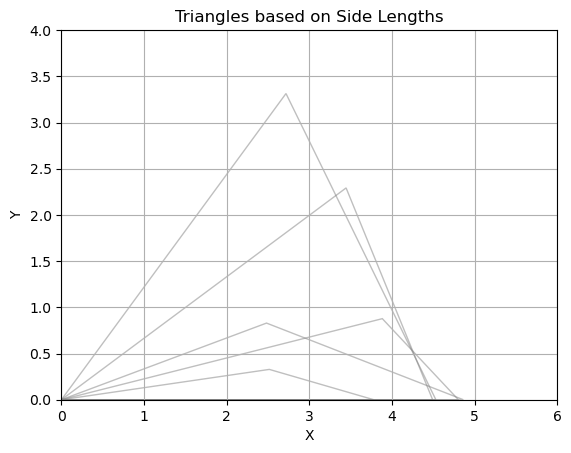

In [7]:
from matplotlib.patches import Polygon

def coordinates_of_triangle_given_SSS(a, b, c):
    """a, b and c are lengths of the sides of a triangle"""

    A = (0, 0) # coordinates of vertex A

    B = (c, 0) # coordinates of vertex B

    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root

    C = (float(C_x), float(C_y)) # coordinates of vertex C

    vertices = np.array([A,B,C])
    return vertices

fig, ax = plt.subplots()

inv_transformed_points = umap_model.inverse_transform(centroids)
print(inv_transformed_points)

print("Number of Clusters: ", len(inv_transformed_points))

for row in inv_transformed_points:
    a, b, c = row
    print(a,b,c)
    coords = coordinates_of_triangle_given_SSS(a, b, c)
    edge_color = (0.5, 0.5, 0.5, 0.5)  # RGBA tuple for transparent grey
    p = Polygon(coords, edgecolor=edge_color, facecolor='none')
    ax.add_patch(p)

# Set plot limits
plt.xlim(0, 15)
plt.ylim(0, 15)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangles based on Side Lengths')

plt.grid(True)
plt.xlim(0,6)
plt.ylim(0,4)
plt.show()